<a href="https://colab.research.google.com/github/deepakk177/ML---Lab-Programs-MTech-AI-2025-/blob/main/Machine_Learning_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Lab 9**
**Name :** Deepak Singh Porte

**Scholar Number :** 25215011122

# Machine Learning Lab: Naive Bayes & Decision Tree Classifier


Naive Bayes Classifier
Dataset: SMS Spam Collection Dataset (spam.csv)


Question:
Use the SMS Spam Collection dataset to build a text classification model that
predicts whether a message is spam or not using the Naive Bayes algorithm.
Tasks:
1. Clean and preprocess the text (lowercasing, stopword removal,
optional stemming).
2. Convert text to numerical features using TF-IDF.
3. Train a Multinomial Naive Bayes classifier.
4. Report accuracy, precision, recall, and confusion matrix.
5. Show two examples where the model misclassified messages and
explain possible reasons.

In [ ]:
import csv
import math
import re
import string
import random
rows = []
with open("/content/sample_data/spam.csv", "r", encoding="latin-1") as f:
    reader = csv.reader(f)
    for r in reader:
        rows.append(r)
data = []
for r in rows[1:]:
    if len(r) >= 2:
        data.append([r[0], r[1]])
stopwords = {
    "the","a","an","is","are","am","to","and","or","of","in","on","at",
    "for","this","that","be","with","as","by","it","from","was","were",
    "but","so","if","then"
}
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = [w for w in text.split() if w not in stopwords]
    return words
random.shuffle(data)
split = int(0.8 * len(data))
train = data[:split]
test = data[split:]
vocab = set()
train_cleaned = []
for label, text in train:
    words = clean_text(text)
    train_cleaned.append((label, words))
    for w in words:
        vocab.add(w)
vocab = list(vocab)
vocab_index = {word: i for i, word in enumerate(vocab)}
def compute_tfidf(words):
    tf = {}
    for w in words:
        if w in vocab_index:
            tf[w] = tf.get(w, 0) + 1
    vec = [0] * len(vocab)
    for w, count in tf.items():
        df = 0
        for _, twords in train_cleaned:
            if w in twords:
                df += 1
        idf = math.log((1 + len(train_cleaned)) / (1 + df)) + 1
        vec[vocab_index[w]] = count * idf
    return vec
X_train = []
y_train = []
for label, words in train_cleaned:
    X_train.append(compute_tfidf(words))
    y_train.append(label)
spam_count = y_train.count("spam")
ham_count = y_train.count("ham")
P_spam = spam_count / len(y_train)
P_ham = ham_count / len(y_train)
spam_word_sum = [1] * len(vocab)
ham_word_sum  = [1] * len(vocab)
spam_total = len(vocab)
ham_total  = len(vocab)
for i, vec in enumerate(X_train):
    if y_train[i] == "spam":
        for j in range(len(vocab)):
            spam_word_sum[j] += vec[j]
            spam_total += vec[j]
    else:
        for j in range(len(vocab)):
            ham_word_sum[j] += vec[j]
            ham_total += vec[j]
P_word_given_spam = [math.log(spam_word_sum[i] / spam_total) for i in range(len(vocab))]
P_word_given_ham  = [math.log(ham_word_sum[i]  / ham_total) for i in range(len(vocab))]
def predict(words):
    vec = compute_tfidf(words)
    log_spam = math.log(P_spam)
    log_ham  = math.log(P_ham)
    for i in range(len(vocab)):
        log_spam += vec[i] * P_word_given_spam[i]
        log_ham  += vec[i] * P_word_given_ham[i]
    if log_spam > log_ham:
        return "spam"
    return "ham"
y_true = []
y_pred = []
for label, text in test:
    y_true.append(label)
    y_pred.append(predict(clean_text(text)))
TP = FP = TN = FN = 0
for actual, pred in zip(y_true, y_pred):
    if actual == "spam" and pred == "spam": TP += 1
    if actual == "spam" and pred == "ham":  FN += 1
    if actual == "ham"  and pred == "spam": FP += 1
    if actual == "ham"  and pred == "ham":  TN += 1
accuracy  = (TP + TN) / len(test)
precision = TP / (TP + FP) if TP + FP != 0 else 0
recall    = TP / (TP + FN) if TP + FN != 0 else 0
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("\nConfusion Matrix:")
print([[TN, FP], [FN, TP]])
print("\nTwo Misclassified Examples:\n")
count = 0
for (actual, pred, row) in zip(y_true, y_pred, test):
    if actual != pred:
        print("Actual:", actual)
        print("Predicted:", pred)
        print("Message:", row[1])
        print()
        count += 1
        if count == 2:
            break

Accuracy : 0.9829596412556054
Precision: 0.952054794520548
Recall   : 0.9205298013245033

Confusion Matrix:
[[957, 7], [12, 139]]

Two Misclassified Examples:

Actual: spam
Predicted: ham
Message: Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I wrote. I'm waiting for your opinions. I want to be your friend 1/1

Actual: ham
Predicted: spam
Message: Have you laid your airtel line to rest?



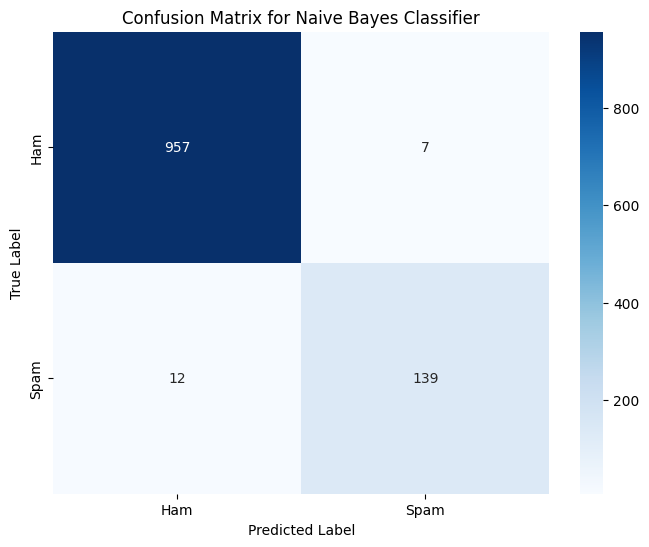

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define conf_matrix from the calculated TN, FP, FN, TP values
conf_matrix = [[TN, FP], [FN, TP]]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

2. Decision Tree Classifier
Dataset: IRIS dataset (iris.csv)


Question:
Using the IRIS dataset, build a Decision Tree Classifier to classify flower
species based on sepal and petal measurements.
Tasks:
1. Load and split the dataset into training and testing sets.
2. Train a Decision Tree using Gini and Entropy criteria separately.
3. Compare model performance for both criteria using accuracy and
classification report.
4. Visualize the decision tree and explain the first two splits in simple
terms.


=== GINI MODEL PERFORMANCE ===
Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30


=== ENTROPY MODEL PERFORMANCE ===
Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



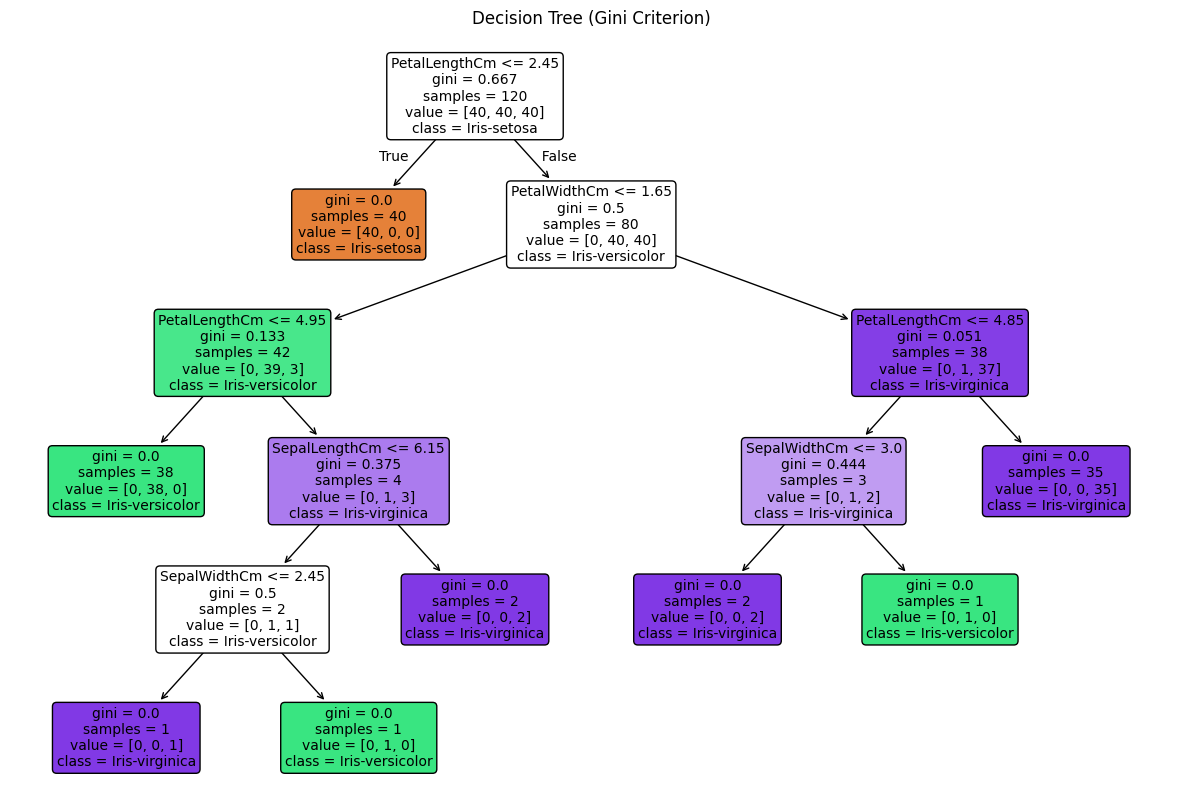

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------------------
df = pd.read_csv("/content/sample_data/Iris.csv")

# Remove Id column if present
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

# Features and target
X = df.drop("Species", axis=1)
y = df["Species"]

# -------------------------------------------------------------
# 2. Train-Test Split
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------------------------------------
# 3. Train Decision Trees (Gini & Entropy)
# -------------------------------------------------------------
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

# -------------------------------------------------------------
# 4. Predictions & Evaluation
# -------------------------------------------------------------
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

print("\n=== GINI MODEL PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

print("\n=== ENTROPY MODEL PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

# -------------------------------------------------------------
# 5. Visualize the Decision Tree (Gini version)
# -------------------------------------------------------------
plt.figure(figsize=(15, 10))
plot_tree(
    dt_gini,
    feature_names=X.columns,
    class_names=dt_gini.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Gini Criterion)")
plt.show()